In [14]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [15]:
customer_data = pd.read_csv('../data-sources/customer-churn/customer-churn.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
customer_data.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender', 'tenure': 'Tenure'}, inplace=True)

In [18]:
def ColumnTransformer(cell):
    if cell == 0:
        return 'No'
    else:
        return 'Yes'

In [19]:
customer_data['SeniorCitizen'] = customer_data['SeniorCitizen'].apply(ColumnTransformer)

In [20]:
def ColumnTransformer(cell):
    if cell == 'Electronic check':
        return 'ElCh'
    elif cell == 'Mailed check':
        return 'MaCh'
    elif cell == 'Bank transfer (automatic)':
        return 'BaTr-A'
    else:
        return 'CrCa-A'

In [21]:
customer_data['PaymentMethod'] = customer_data['PaymentMethod'].apply(ColumnTransformer)

In [22]:
customer_data.drop(customer_data[customer_data['Tenure'] == 0].index, inplace=True)

In [23]:
customer_data['TotalCharges'] = customer_data['TotalCharges'].astype(float)

In [24]:
customer_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustomerID,7032,7032,3018-TFTSU,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,7032,2,Male,3549,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7032,2,No,5890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7032,2,No,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7032,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,7032,NaN,NaN,NaN,32.4218,24.5453,1,9,29,55,72
PhoneService,7032,2,Yes,6352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7032,3,No,3385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7032,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7032,3,No,3497,NaN,NaN,NaN,NaN,NaN,NaN,NaN


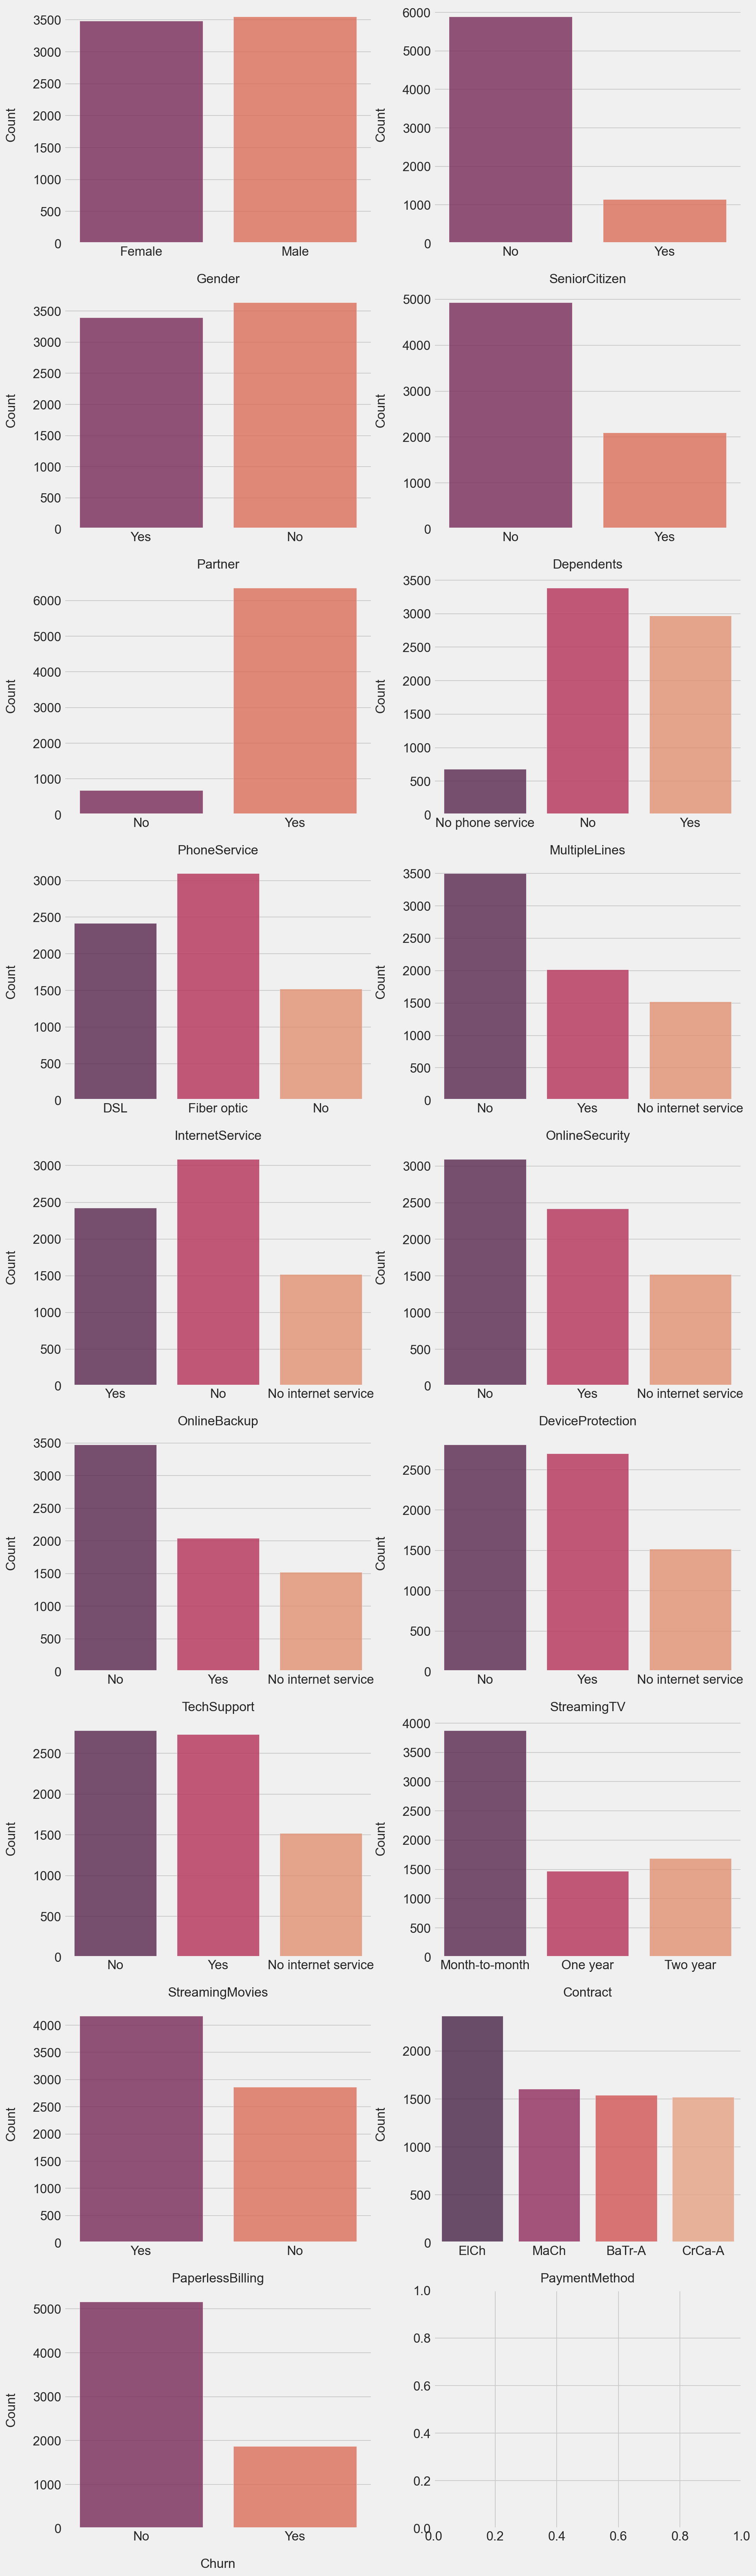

In [25]:
fig1, ax1 = plt.subplots(nrows=9, ncols=2, figsize=(14, 56))

index = 1
categorical = customer_data.select_dtypes(include='object')
for i in range(1, len(categorical.columns)):
    try:
        sns.countplot(data=customer_data, x=categorical.columns[index], orient='h', palette='rocket',
                      alpha=0.8, ax=ax1[i-1, 0])
        ax1[i-1, 0].set_xlabel(categorical.columns[index], labelpad=20)
        ax1[i-1, 0].set_ylabel('Count', labelpad=20)
        index += 1
    
        sns.countplot(data=customer_data, x=categorical.columns[index], orient='h', palette='rocket',
                      alpha=0.8, ax=ax1[i-1, 1])
        ax1[i-1, 1].set_xlabel(categorical.columns[index], labelpad=20)
        ax1[i-1, 1].set_ylabel('Count', labelpad=20)
        index += 1
    except:
        pass
    
plt.show()

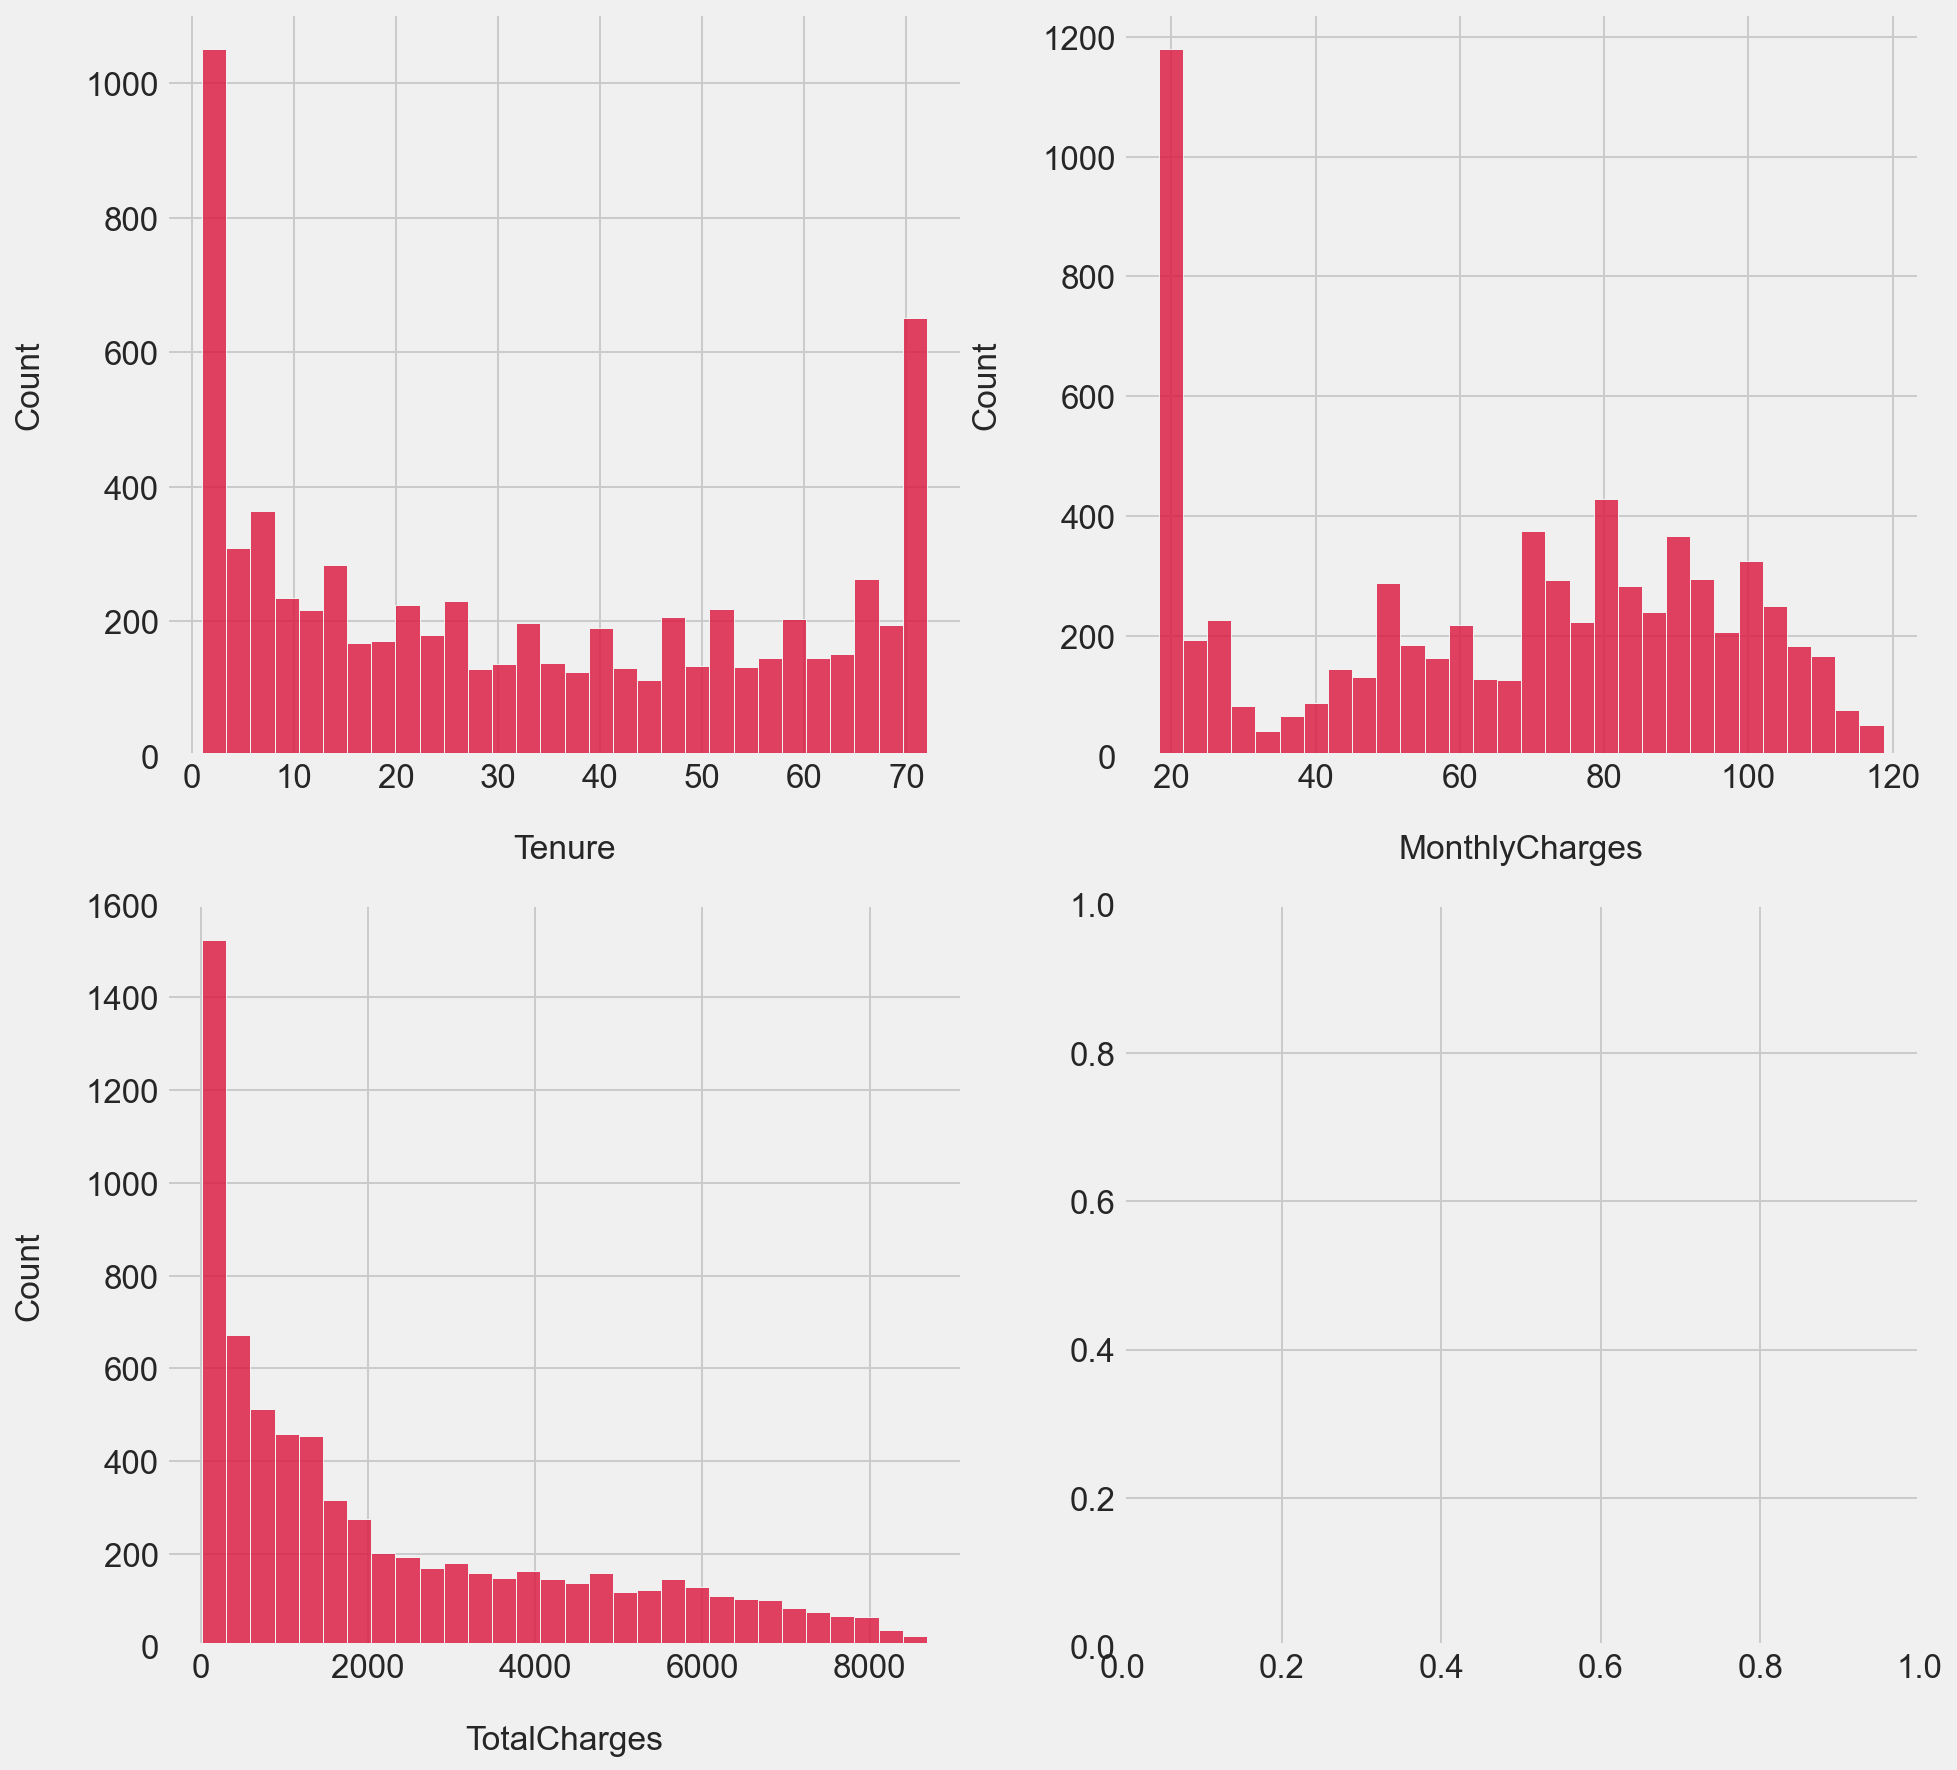

In [26]:
fig1, ax1 = plt.subplots(nrows=2, ncols=2, figsize=(14, 14))

index = 0
numerical = customer_data.select_dtypes(include=['int', 'float'])
for i in range(len(numerical.columns)):
    try:
        sns.histplot(data=customer_data, x=numerical.columns[index], bins=30, color='crimson',
                     alpha=0.8, ax=ax1[i, 0])
        ax1[i, 0].set_xlabel(numerical.columns[index], labelpad=20)
        ax1[i, 0].set_ylabel('Count', labelpad=20)
        index += 1
    
        sns.histplot(data=customer_data, x=numerical.columns[index], bins=30, color='crimson',
                     alpha=0.8, ax=ax1[i, 1])
        ax1[i, 1].set_xlabel(numerical.columns[index], labelpad=20)
        ax1[i, 1].set_ylabel('Count', labelpad=20)
        index += 1
    except:
        pass
    
plt.show()